In [111]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Ignoring the warnings

import warnings 
warnings.filterwarnings("ignore")

Loading and Understanding the Dataset

In [114]:
df = pd.read_csv("application_data.csv")

In [115]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [116]:
#Checking data
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [117]:
#Checking shape for dataset
df.shape

(307511, 122)

In [118]:
#Checking columns in dataset
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Data Cleaning and Handling

In [120]:
# First we need to know how much null values in this datset
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [121]:
#Determine the % of the missing value against the dataset
round(100*df.isnull().sum()/len(df),4)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


In [122]:
#Removing columns that is not going to impact on our analysis those that has more than 30% of missing values
missing_values = df.isnull().mean()
df_1 = missing_values[missing_values.values >= 0.3].index
df.drop(labels=df_1, axis=1, inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,N

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [124]:
#Columns name with "FLAG" have no signigicant information value to this analysis, so dropping them from this dataset
for i in df.columns:
    if i.startswith("FLAG"):
        df.drop(columns=i, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [125]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
#Noticing columns like DAYS_EMPLOYED DAYS_BIRTH, DAYS_ID_PUBLISH AND DAYS_REGISTRATION some values are in negative which is unlikely, converting them into absolute values

df.DAYS_BIRTH = df.DAYS_BIRTH.abs()
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.abs()
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.abs()
df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
#columns with very little missing value can be replaced with median, mean or mode value depending how data distributed. Thus we need to check how data contributed first
# 1. AMT_ANNUITY

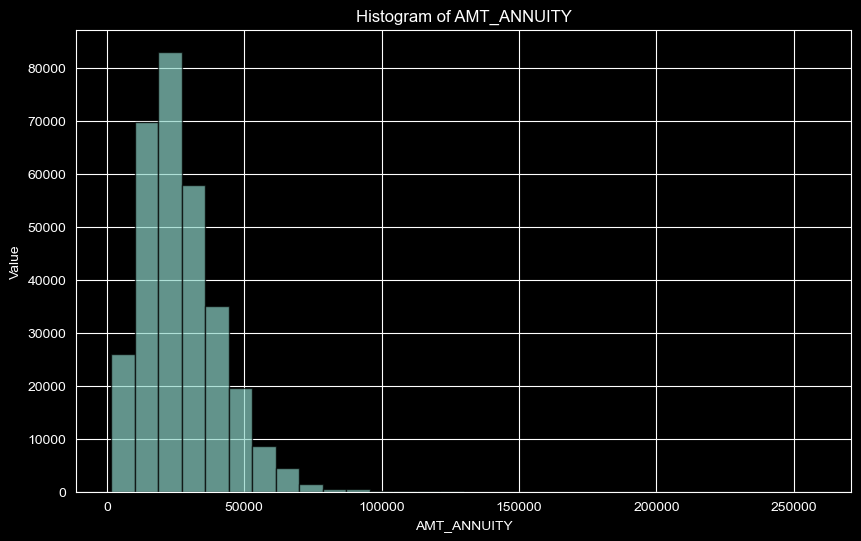

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(df["AMT_ANNUITY"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of AMT_ANNUITY")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("Value")
plt.show()

In [129]:
#Since column AMT_ANNUITY is positively skewed, we can replace the missing value with median value
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median(), inplace=True)
#Now finding out if column AMT_ANNUITY still having missing value
df["AMT_ANNUITY"].isnull().sum()

0

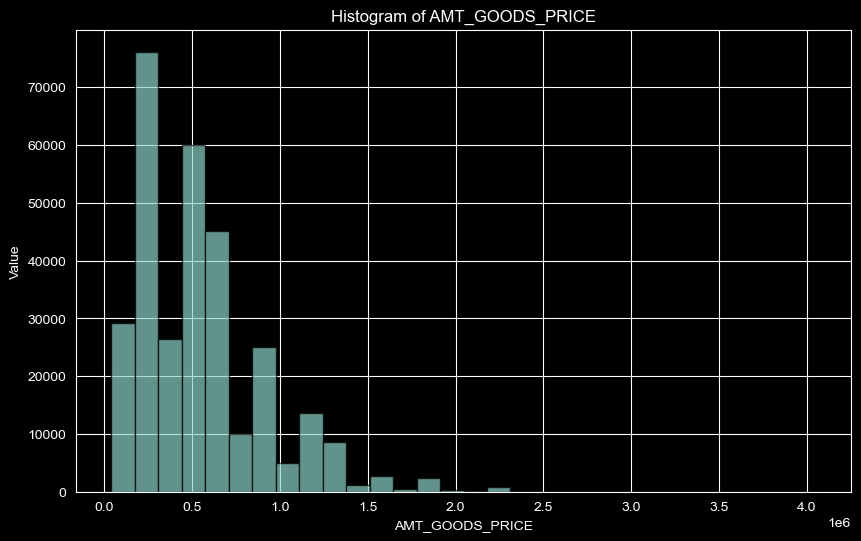

In [130]:
#2. AMT_GOODS_PRICE 

plt.figure(figsize=(10, 6))
plt.hist(df["AMT_GOODS_PRICE"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of AMT_GOODS_PRICE")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("Value")
plt.show()

In [131]:
#Since column AMT_GOODS_PRICE is positively skewed, we can replace the missing value with median value
df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median(), inplace=True)
df["AMT_GOODS_PRICE"].isnull().sum()

0

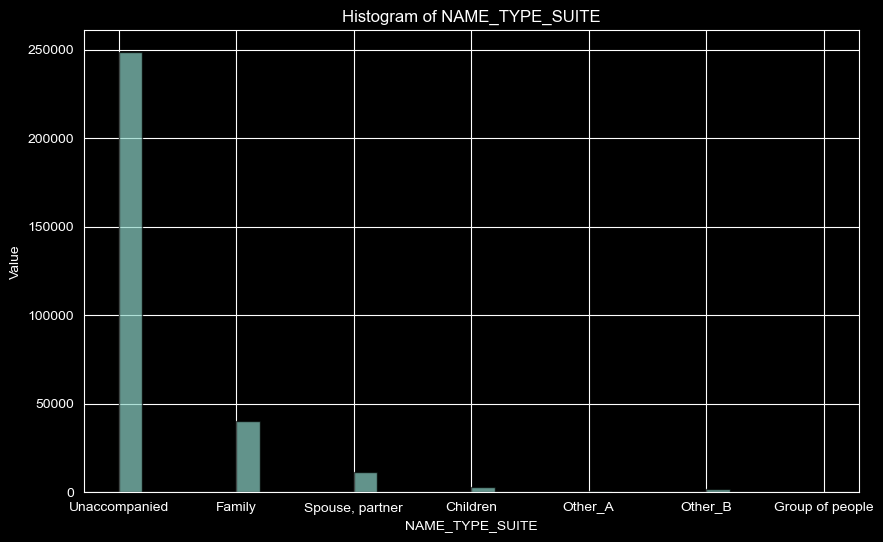

In [132]:
#3. NAME_TYPE_SUITE

plt.figure(figsize=(10, 6))
plt.hist(df["NAME_TYPE_SUITE"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of NAME_TYPE_SUITE")
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Value")
plt.show()

In [133]:
#Since column AMT_GOODS_PRICE has no clear distribution, we can replace the missing value with mode value
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0], inplace=True)
df["NAME_TYPE_SUITE"].isnull().sum()

0

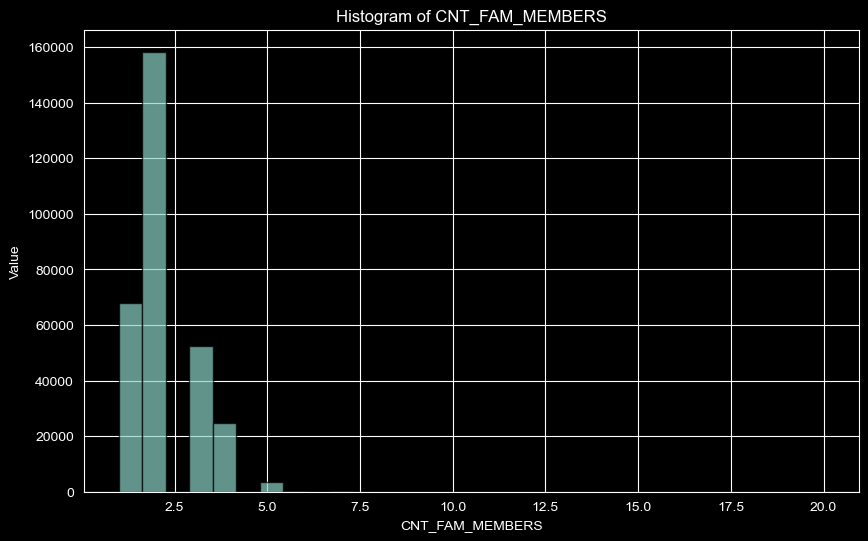

In [134]:
#4. CNT_FAM_MEMBERS

plt.figure(figsize=(10, 6))
plt.hist(df["CNT_FAM_MEMBERS"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of CNT_FAM_MEMBERS")
plt.xlabel("CNT_FAM_MEMBERS")
plt.ylabel("Value")
plt.show()

In [135]:
#Although CNT_FAM_MEMBERS has no clear distribution, CNT_FAM_MEMBERS column is a numeric column then replacing null value with median 
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].median(), inplace=True)
df["CNT_FAM_MEMBERS"].isnull().sum()

0

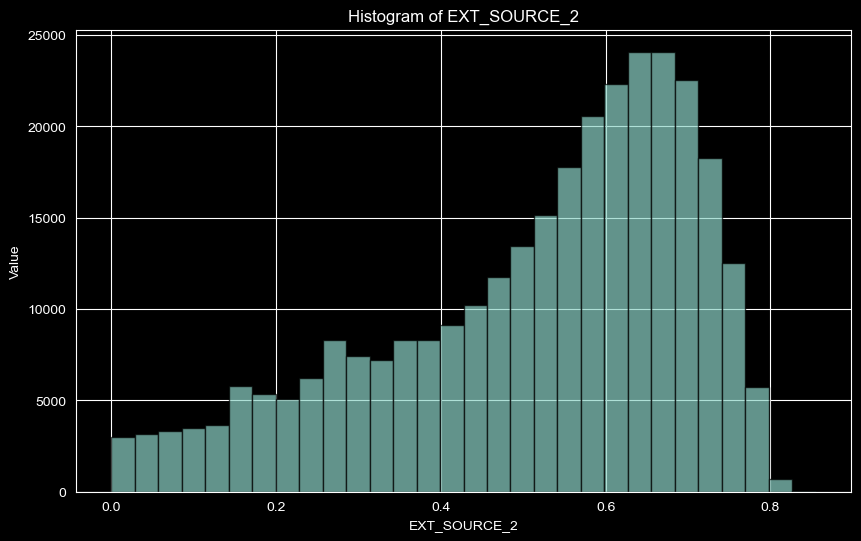

In [136]:
#5. EXT_SOURCE_2

plt.figure(figsize=(10, 6))
plt.hist(df["EXT_SOURCE_2"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of EXT_SOURCE_2")
plt.xlabel("EXT_SOURCE_2")
plt.ylabel("Value")
plt.show()

In [137]:
#Since EXT_SOURCE_2 is negatively skewed, replacing null values with median 
df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median(), inplace=True)
df["EXT_SOURCE_2"].isnull().sum()

0

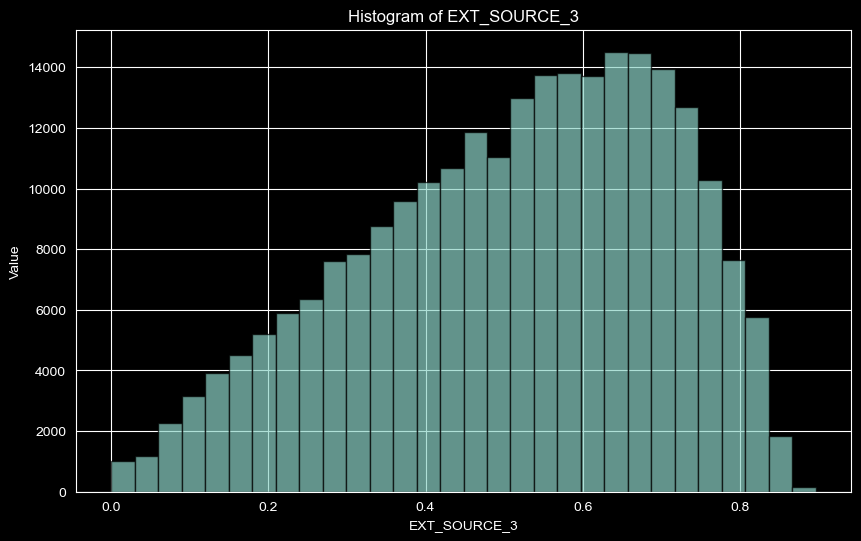

In [138]:
#6. EXT_SOURCE_3

plt.figure(figsize=(10, 6))
plt.hist(df["EXT_SOURCE_3"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of EXT_SOURCE_3")
plt.xlabel("EXT_SOURCE_3")
plt.ylabel("Value")
plt.show()

In [139]:
#Since EXT_SOURCE_3 is negatively skewed, replacing null values with median 
df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median(), inplace=True)
df["EXT_SOURCE_3"].isnull().sum()

0

In [140]:
# columns like OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are categorical so it's better replacing mode value. 
mode_value = df["OBS_30_CNT_SOCIAL_CIRCLE"].mode()[0]
mode_value

0.0

In [141]:
#Mode value is 0.00 in OBS_30_CNT_SOCIAL_CIRCLE column so replacing missing values with 0.0
#7
df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)
df["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [142]:
#Now do the same for column DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE
mode_value1 = df["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0]
mode_value1

0.0

In [143]:
#8
df["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)
df["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [144]:

mode_value2 = df["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0]
mode_value2

0.0

In [145]:
#9
df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)
df["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [146]:
mode_value3 = df["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0]
mode_value3

0.0

In [147]:
#10
df["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)
df["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [148]:
# Now see how many columns still have missing values.
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

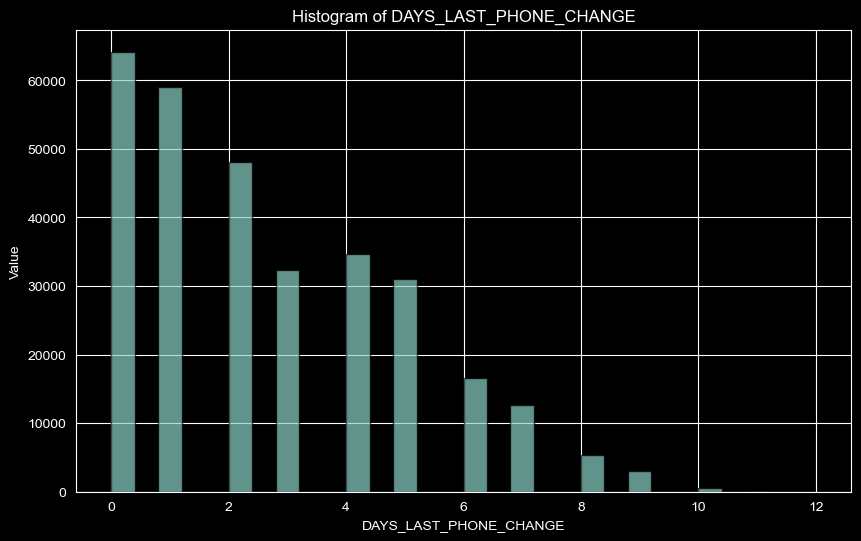

In [149]:
#11. DAYS_LAST_PHONE_CHANGE

df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].abs()
df["DAYS_LAST_PHONE_CHANGE"] = round(df["DAYS_LAST_PHONE_CHANGE"]/365,0)
plt.figure(figsize=(10, 6))
plt.hist(df["DAYS_LAST_PHONE_CHANGE"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of DAYS_LAST_PHONE_CHANGE")
plt.xlabel("DAYS_LAST_PHONE_CHANGE")
plt.ylabel("Value")
plt.show()

In [150]:
df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].mode()[0], inplace=True)
df["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

0

In [151]:
#columns like AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR are common in this anaylsis since we are doing an analysis about granting loans based on applicant's credit check, data in these columns often lead to skewed distribtuion so using median value to replace missing value would be more sensible. 
df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']] = df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].apply(lambda x: x.fillna(x.median()))
df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [152]:
#if we like to see in which age range clients tends to pay their intalments or not, then DAY_BIRTH needs to be easy to read and analyse
df["AGE"] = df["DAYS_BIRTH"].abs()
df["AGE"] = round(df["AGE"]/365,0)
df = df.drop(["DAYS_BIRTH"],axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833.0,2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311.0,3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,236,8456.0,1982,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,365243,4388.0,4090,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,7921,6737.0,5150,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,41.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,4786,2562.0,931,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


In [153]:
#if we like to see clients who just been employed tends to pay their intalments or not, then DAYS_EMPLOYED needs to be easy to read and analyse
df["WORK_YEARS"] = df["DAYS_EMPLOYED"].abs()
df["WORK_YEARS"] = round(df["WORK_YEARS"]/365,0)
df = df.drop(["DAYS_EMPLOYED"],axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,WORK_YEARS
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,8.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,8456.0,1982,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1.0
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,4388.0,4090,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0,1001.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,6737.0,5150,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,41.0,22.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,2562.0,931,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,13.0


In [154]:
#Let's check if in column CODE_GENDER is strictly F or M
df["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [155]:
#There are only 4 entries without indicating F or M, we can replace it with mode value and it won't cause extreme distribution, so replacing it with F
df.loc[df["CODE_GENDER"]=="XNA", "CODE_GENDER"]="F"
df["CODE_GENDER"].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [156]:
#Let's check if in column TARGET is strictly 1 or 0
df["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [157]:
df.to_csv("df_filtered.csv", index=False)

In [158]:
#Now we can do the same for previouse dataset as well

df1 = pd.read_csv("previous_application.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [159]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [160]:
round(100*df1.isnull().sum()/len(df1),4)

SK_ID_PREV                      0.0000
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
AMT_ANNUITY                    22.2867
AMT_APPLICATION                 0.0000
AMT_CREDIT                      0.0001
AMT_DOWN_PAYMENT               53.6365
AMT_GOODS_PRICE                23.0818
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
RATE_DOWN_PAYMENT              53.6365
RATE_INTEREST_PRIMARY          99.6437
RATE_INTEREST_PRIVILEGED       99.6437
NAME_CASH_LOAN_PURPOSE          0.0000
NAME_CONTRACT_STATUS            0.0000
DAYS_DECISION                   0.0000
NAME_PAYMENT_TYPE               0.0000
CODE_REJECT_REASON              0.0000
NAME_TYPE_SUITE                49.1198
NAME_CLIENT_TYPE                0.0000
NAME_GOODS_CATEGORY             0.0000
NAME_PORTFOLIO                  0.0000
NAME_PRODUCT_TYPE               0.0000
CHANNEL_TYPE             

In [161]:
#Removing columns that is not going to impact on our analysis those that has more than 30% of missing values
missing_values1 = df1.isnull().mean()
df1_1 = missing_values1[missing_values1.values >= 0.3].index
df1.drop(labels=df1_1, axis=1, inplace=True)
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [162]:
columns_to_drop =["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY"]

df1 = df1.drop(columns=[col for col in columns_to_drop if col in df1.columns])

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [164]:
df1["DAYS_DECISION"] = df1["DAYS_DECISION"].abs()
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [165]:
df1["SELLERPLACE_AREA"] = df1["SELLERPLACE_AREA"].abs()
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),1,XNA,12.0,low_normal,Cash X-Sell: low


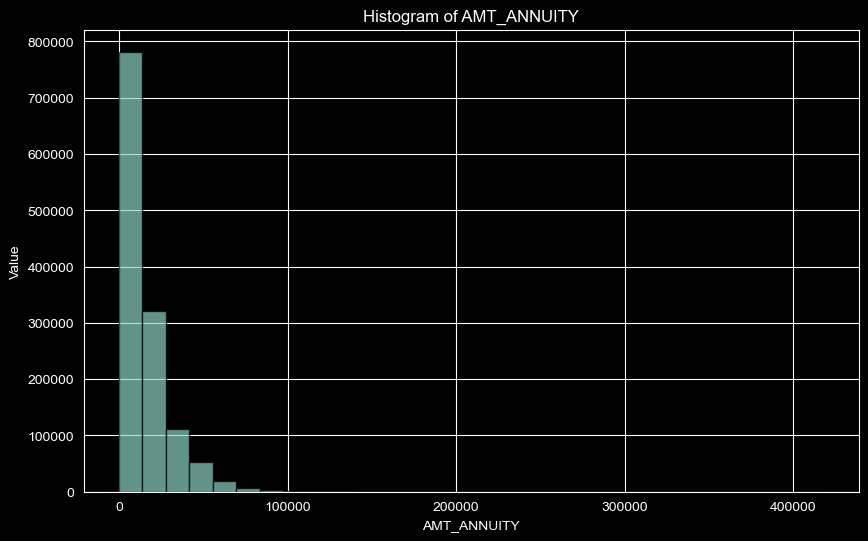

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(df1["AMT_ANNUITY"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of AMT_ANNUITY")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("Value")
plt.show()

In [167]:
df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median(), inplace=True)
#Now finding out if column AMT_ANNUITY still having missing value
df1["AMT_ANNUITY"].isnull().sum()

0

In [168]:
#there are very little missting value of "AMT_CREDIT" so we can use mode and should not affecting distribution.
df1["AMT_CREDIT"].mode()

0    0.0
Name: AMT_CREDIT, dtype: float64

In [169]:
df1["AMT_CREDIT"].fillna(0.0, inplace=True)
df1["AMT_CREDIT"].isnull().sum()

0

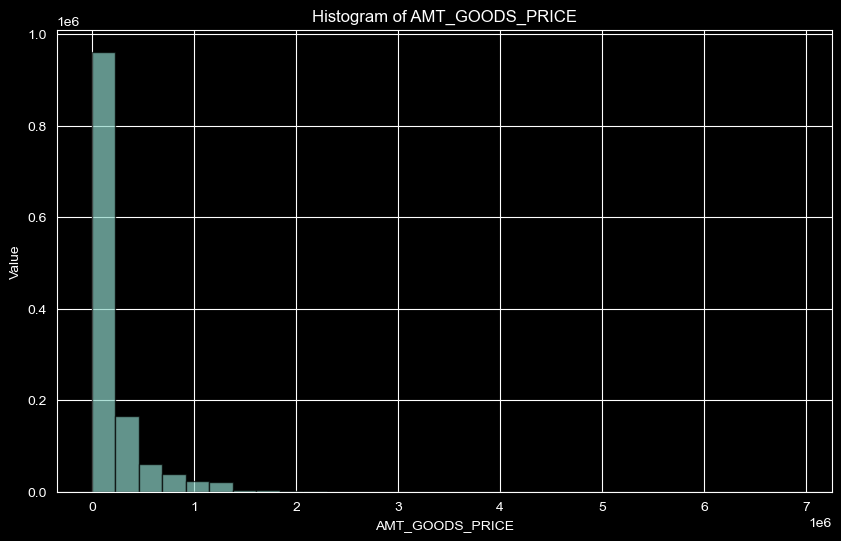

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(df1["AMT_GOODS_PRICE"].dropna(), bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of AMT_GOODS_PRICE")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("Value")
plt.show()

In [171]:
df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median(), inplace=True)
df1["AMT_GOODS_PRICE"].isnull().sum()

0

In [172]:
df1["PRODUCT_COMBINATION"].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [173]:
df1["PRODUCT_COMBINATION"].fillna("Cash", inplace=True)
df1["PRODUCT_COMBINATION"].isnull().sum()

0

In [174]:
df1["CNT_PAYMENT"].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [175]:
df1["CNT_PAYMENT"].fillna(df1["CNT_PAYMENT"].median(), inplace=True)
df1["CNT_PAYMENT"].isnull().sum()

0

In [176]:
round(100*df1.isnull().sum()/len(df1),4)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NAME_CONTRACT_TYPE        0.0
AMT_ANNUITY               0.0
AMT_APPLICATION           0.0
AMT_CREDIT                0.0
AMT_GOODS_PRICE           0.0
NAME_CASH_LOAN_PURPOSE    0.0
NAME_CONTRACT_STATUS      0.0
DAYS_DECISION             0.0
NAME_PAYMENT_TYPE         0.0
CODE_REJECT_REASON        0.0
NAME_CLIENT_TYPE          0.0
NAME_GOODS_CATEGORY       0.0
NAME_PORTFOLIO            0.0
NAME_PRODUCT_TYPE         0.0
CHANNEL_TYPE              0.0
SELLERPLACE_AREA          0.0
NAME_SELLER_INDUSTRY      0.0
CNT_PAYMENT               0.0
NAME_YIELD_GROUP          0.0
PRODUCT_COMBINATION       0.0
dtype: float64

In [177]:
df1.to_csv("df1_filtered.csv", index=False)

Now both datasets had been cleared, I like to analyse both datasets and merge them for my analysis

In [179]:
#current datatset has more columns compared to previous dataset
merged_df = pd.merge(df, df1, how="inner", on="SK_ID_CURR")
merged_df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,WORK_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,1038818,Consumer loans,9251.775,179055.00,179055.0,179055.00,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,1810518,Cash loans,98356.995,900000.00,1035882.0,900000.00,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,2636178,Consumer loans,64567.665,337500.00,348637.5,337500.00,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,2396755,Consumer loans,6737.310,68809.50,68053.5,68809.50,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,1564014,Consumer loans,5357.250,24282.00,20106.0,24282.00,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
5,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,8.0,2078043,Cash loans,24246.000,675000.00,675000.0,675000.00,XNA,Approved,181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,48.0,

In [180]:
merged_df.to_csv("merged_df.csv", index=False)

In [181]:
def detect_outliers_iqr(merged_df):
    outliers = {}
    numeric_df = merged_df.select_dtypes(include=[float, int])  # Select only numeric columns
    for column in numeric_df.columns:
        Q1 = merged_df[column].quantile(0.25)
        Q3 = merged_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)
        outliers[column] = merged_df[column][outlier_condition].count()
    return outliers

# Detect outliers in each numeric column
outliers = detect_outliers_iqr(merged_df)

# Print the number of outliers for each column
for column, count in outliers.items():
    print(f"Column {column} has {count} outliers.")

Column SK_ID_CURR has 0 outliers.
Column TARGET has 122360 outliers.
Column CNT_CHILDREN has 19764 outliers.
Column AMT_INCOME_TOTAL has 64298 outliers.
Column AMT_CREDIT_x has 24057 outliers.
Column AMT_ANNUITY_x has 29906 outliers.
Column AMT_GOODS_PRICE_x has 57023 outliers.
Column REGION_POPULATION_RELATIVE has 33990 outliers.
Column DAYS_REGISTRATION has 3095 outliers.
Column DAYS_ID_PUBLISH has 0 outliers.
Column CNT_FAM_MEMBERS has 18565 outliers.
Column REGION_RATING_CLIENT has 352512 outliers.
Column REGION_RATING_CLIENT_W_CITY has 339551 outliers.
Column HOUR_APPR_PROCESS_START has 9492 outliers.
Column REG_REGION_NOT_LIVE_REGION has 17068 outliers.
Column REG_REGION_NOT_WORK_REGION has 62156 outliers.
Column LIVE_REGION_NOT_WORK_REGION has 50961 outliers.
Column REG_CITY_NOT_LIVE_CITY has 104056 outliers.
Column REG_CITY_NOT_WORK_CITY has 314051 outliers.
Column LIVE_CITY_NOT_WORK_CITY has 246069 outliers.
Column EXT_SOURCE_2 has 0 outliers.
Column EXT_SOURCE_3 has 4945 outl

In [182]:
df_filtered = pd.read_csv("df_filtered.csv")

In [183]:
df_filtered.head(40)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,WORK_YEARS
0,100002,1,Cash loans,M,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0
1,100003,0,Cash loans,F,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0
2,100004,0,Revolving loans,M,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0
3,100006,0,Cash loans,F,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,8.0
4,100007,0,Cash loans,M,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0
5,100008,0,Cash loans,M,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,4.0
6,100009,0,Cash loans,F,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1213.0,619,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,38.0,9.0
7,100010,0,Cash loans,M,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,4597.0,2379,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0
8,100011,0,Cash loans,F,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,7427.0,3514,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,1001.0
9,100012,0,Revolving loans,M,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14437.0,3992,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,6.0


In [184]:
#there are value like 1001 in WORK_YEARS column which is unlikely and will be replaced by median
median_work_years = merged_df[merged_df["WORK_YEARS"] != 1001]["WORK_YEARS"].median()

# Replace 1001 with the median in the WORK_YEARS column
merged_df["WORK_YEARS"] = merged_df["WORK_YEARS"].replace(1001, median_work_years)

In [185]:
merged_df.to_csv("merged_df1.csv", index=False)

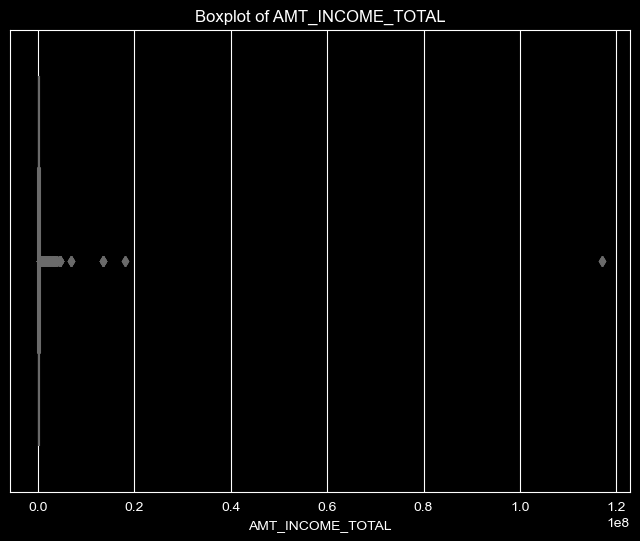

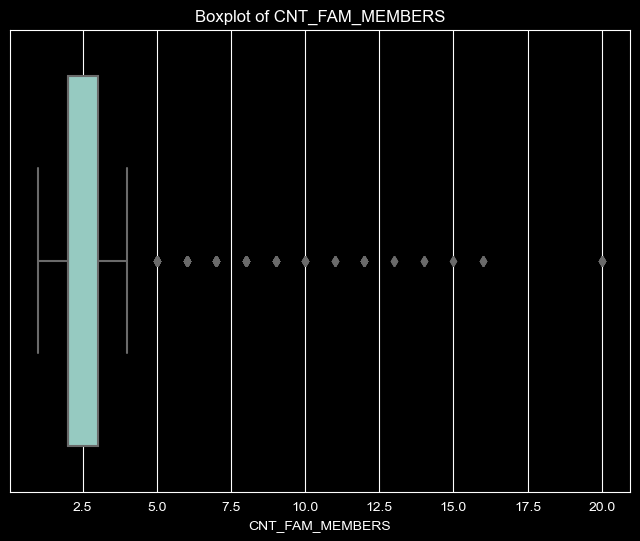

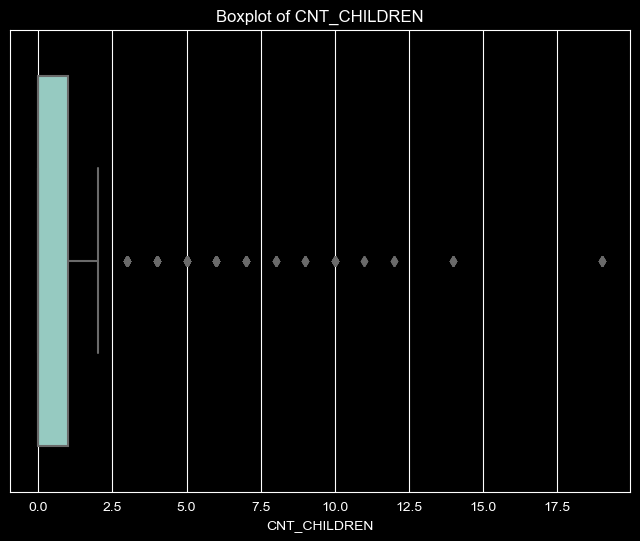

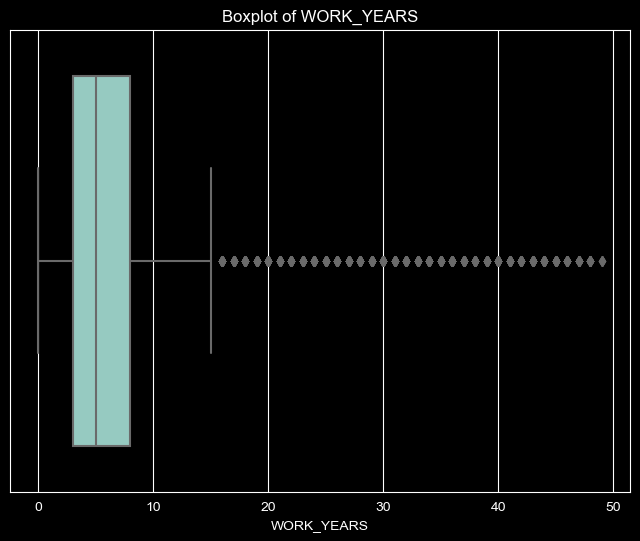

In [186]:
#Due to our analysis about clients are likely to pay their instalment and get loans granted or not, outliers amoung columns related to these factors are matter. Such as income, being employed, number of children or family members clients have as these would affect clients paying their expense.

# So that's CNT_CHILDREN column, AMT_INCOME_TOAL, WORK_YEARS and CNT_FAM_MEMBERS

# List of columns that might affect a client's affordability
columns_to_plot = ["AMT_INCOME_TOTAL", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "WORK_YEARS"]

# Loop through each column and create a boxplot
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

Outliers amoung these columns "AMT_INCOME_TOTAL", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "WORK_YEARS" indicating different things: Income total's outlier indicating there is client earning much higher salary due to their educational background or professional type. Family members column can indicate some family with high number of members might indicate their have more source of income or not. Children column can indicate families with more children relating to their affordability. Work years column can show clients had been working longer and their ability of repaying loan.   

Data Imbalance

In [189]:
# Calculate the class distribution in the TARGET column
class_distribution = merged_df['TARGET'].value_counts()

# Calculate imbalance ratio
majority_class = max(class_distribution)
minority_class = min(class_distribution)
imbalance_ratio = majority_class / minority_class

# Format the ratio to show like 1:10 or similar
formatted_ratio = f"1:{imbalance_ratio:.0f}" if imbalance_ratio > 1 else f"{imbalance_ratio:.0f}:1"
formatted_ratio

'1:11'

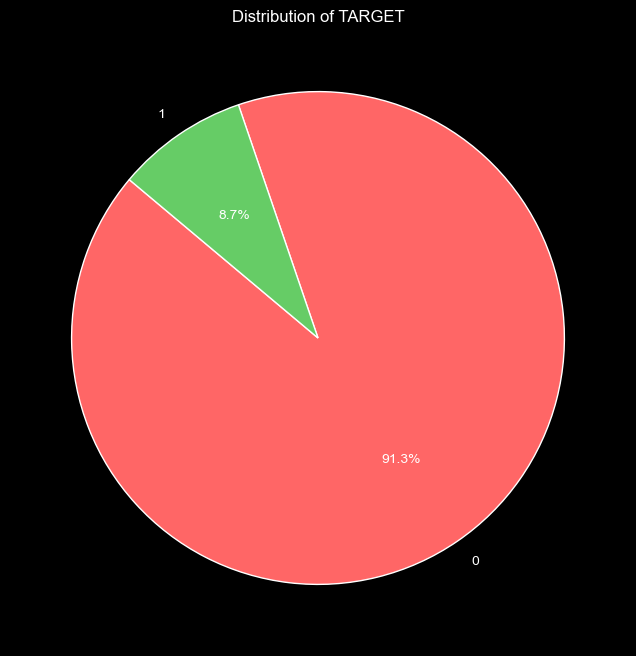

In [190]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff6666', '#66cc66'])  # Red and green colors
plt.title('Distribution of TARGET')
plt.show()

According to column description: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases). From this chart we can see most of the clients don't repay their loan late.

In [192]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 65 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   CNT_CHILDREN                 1413701 non-null  int64  
 5   AMT_INCOME_TOTAL             1413701 non-null  float64
 6   AMT_CREDIT_x                 1413701 non-null  float64
 7   AMT_ANNUITY_x                1413701 non-null  float64
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64
 9   NAME_TYPE_SUITE              1413701 non-null  object 
 10  NAME_INCOME_TYPE             1413701 non-null  object 
 11  NAME_EDUCATION_TYPE          1413701 non-null  object 
 12  NAME_FAMILY_STATUS           1413701 non-n

Univariate, segmented univariate, bivariate analysis

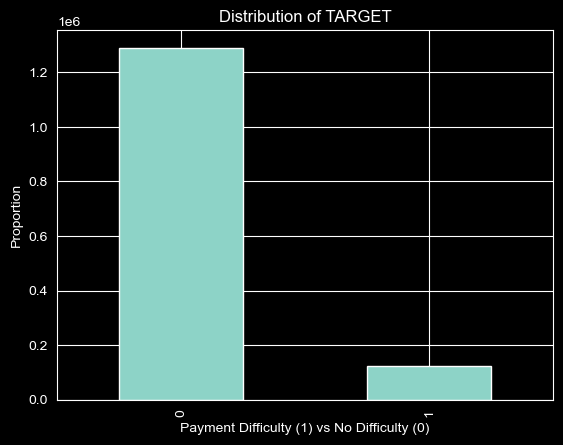

In [194]:
class_distribution.plot(kind='bar')
plt.title('Distribution of TARGET')
plt.xlabel('Payment Difficulty (1) vs No Difficulty (0)')
plt.ylabel('Proportion')
plt.show()

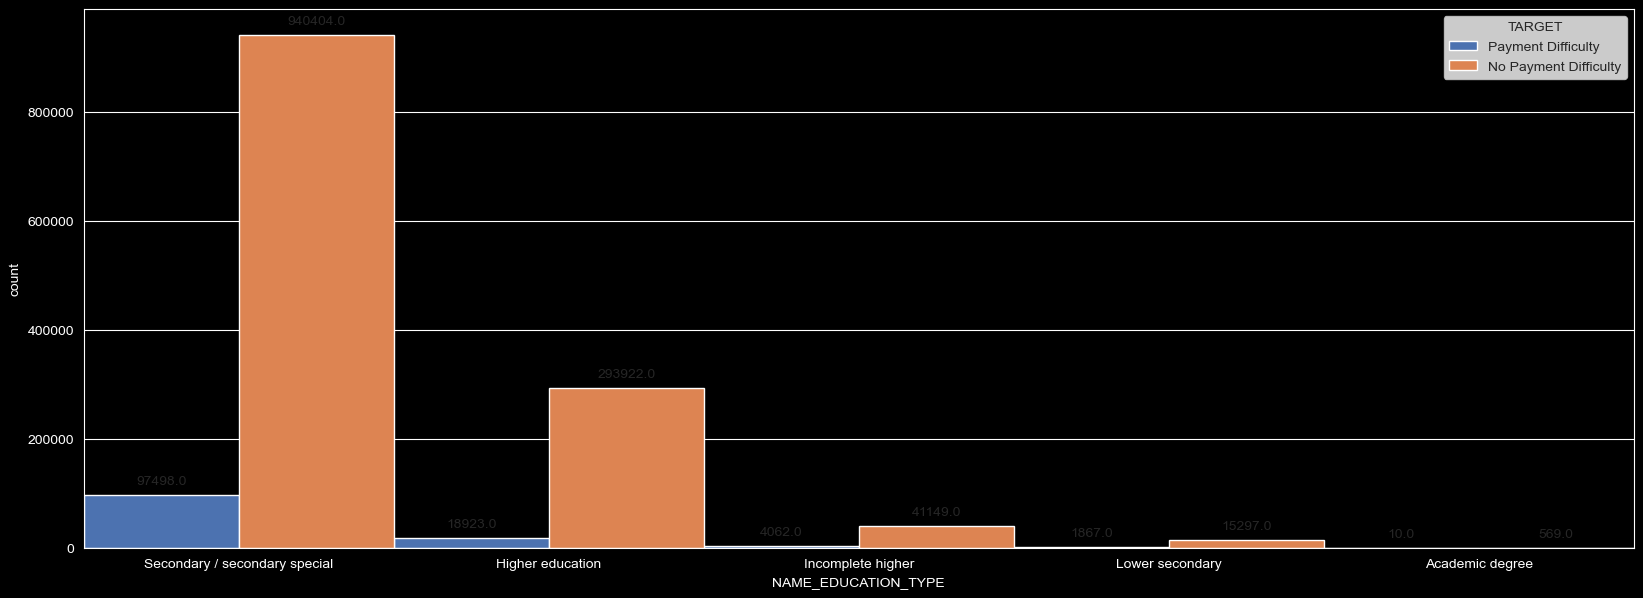

In [195]:

#NAME_EDUCATION_TYPE by TARGET

# Ensure TARGET is a categorical type
merged_df["TARGET"] = merged_df["TARGET"].astype(str)

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_EDUCATION_TYPE",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

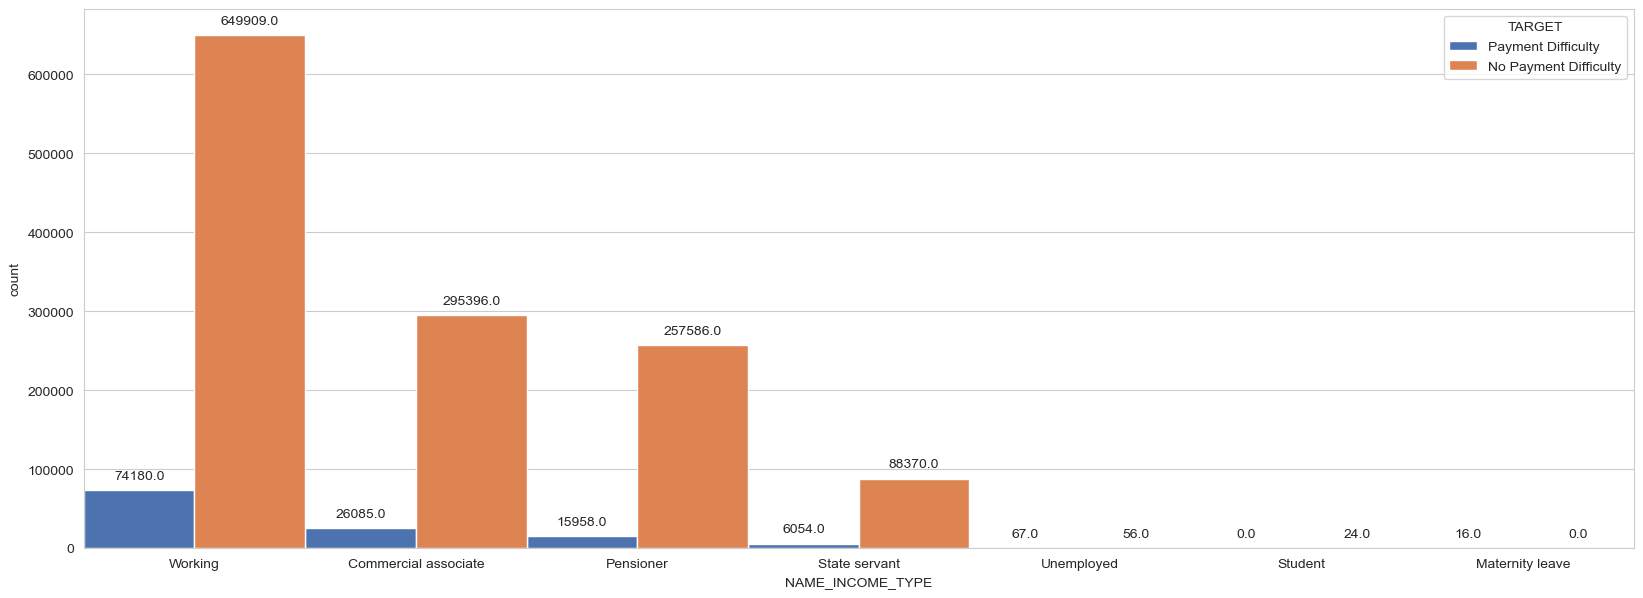

In [196]:
#NAME_INCOME_TYPE BY TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_INCOME_TYPE",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_INCOME_TYPE"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

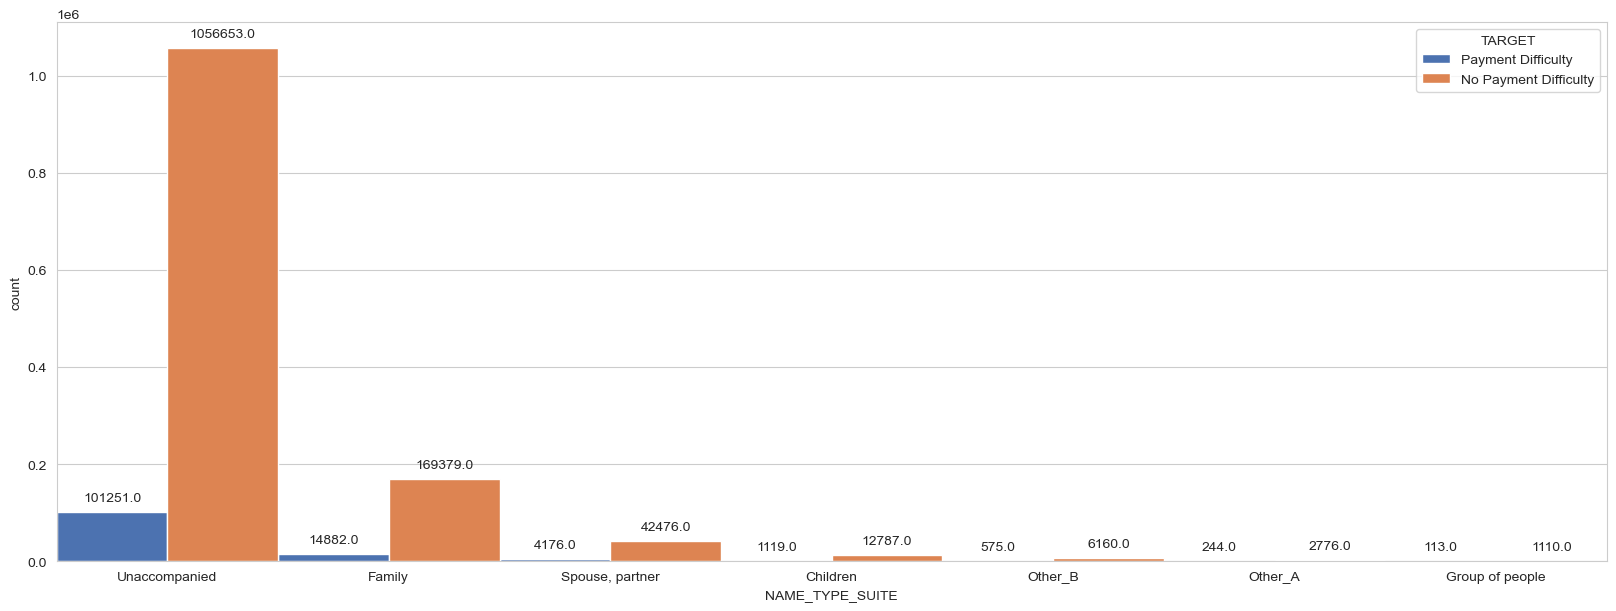

In [197]:
#NAME_TYPE_SUITE - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_TYPE_SUITE",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_TYPE_SUITE"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

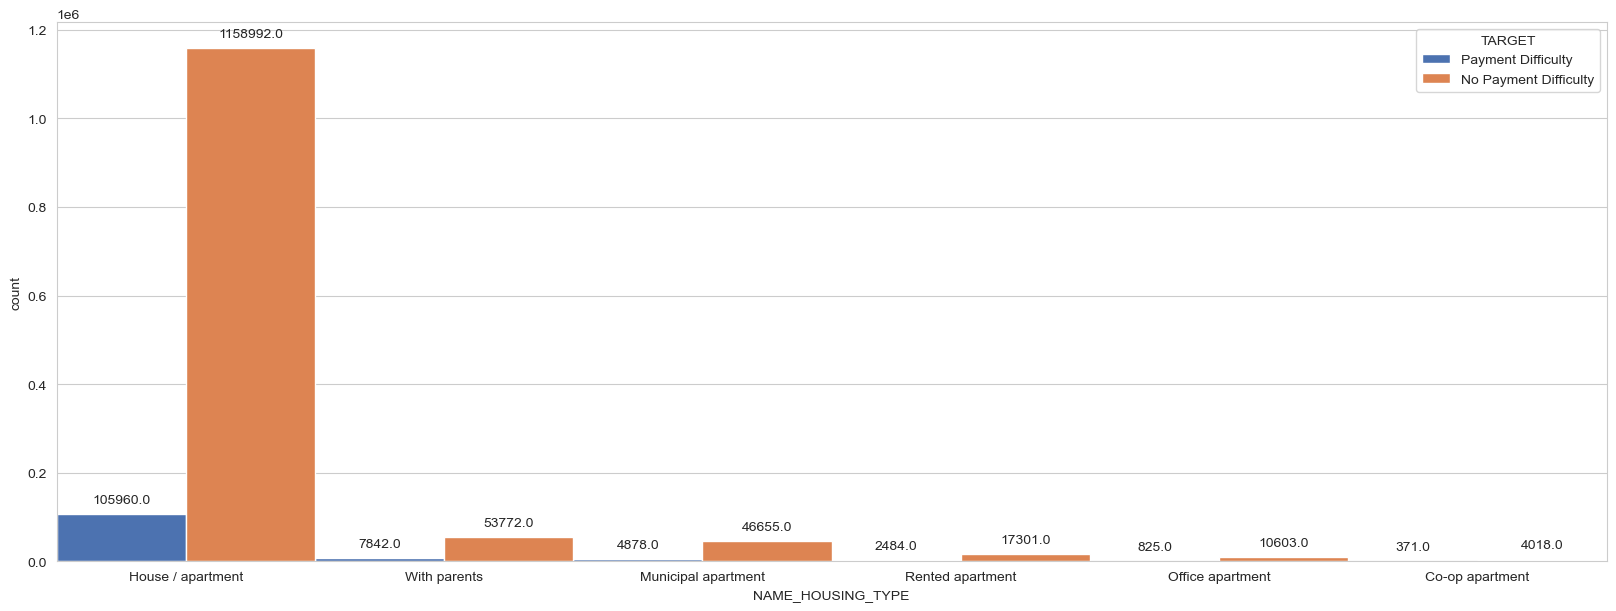

In [198]:
#NAME_HOUSING_TYPE - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_HOUSING_TYPE",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_HOUSING_TYPE"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

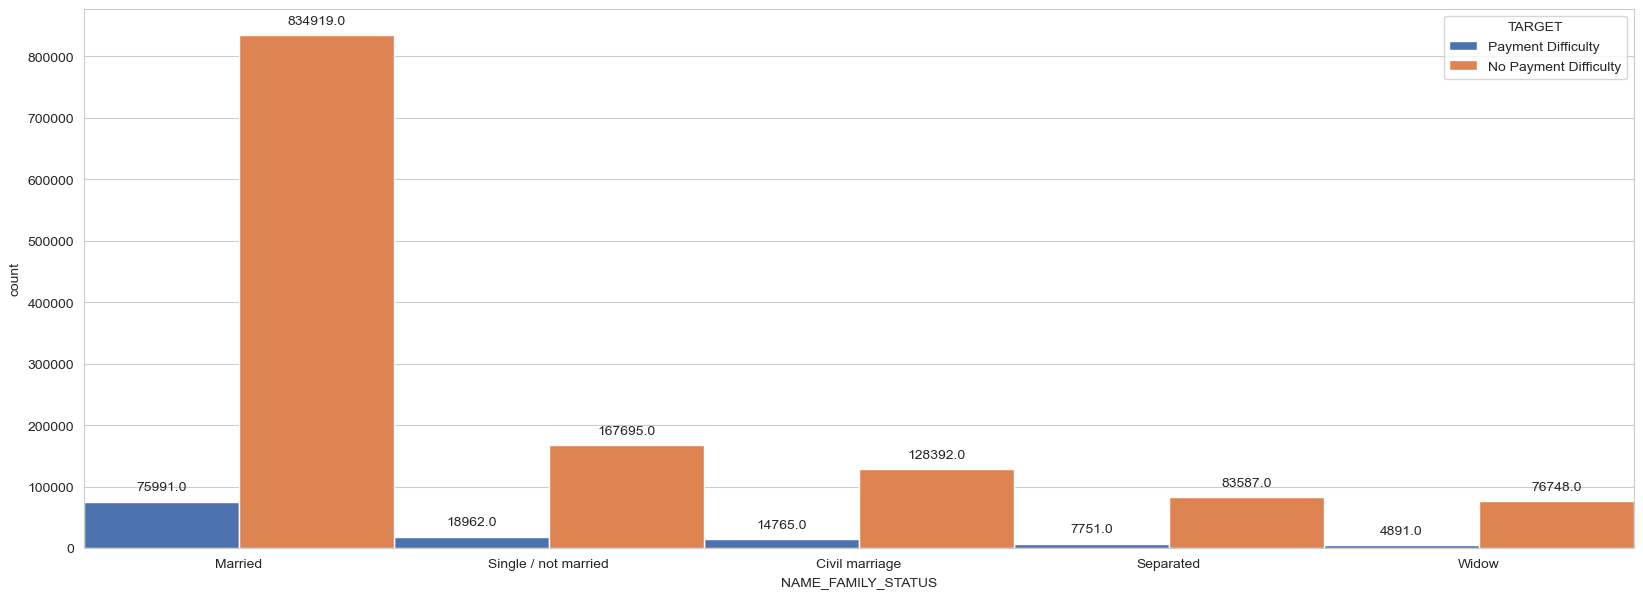

In [199]:
#NAME_FAMILY_STATUS - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_FAMILY_STATUS",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_FAMILY_STATUS"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

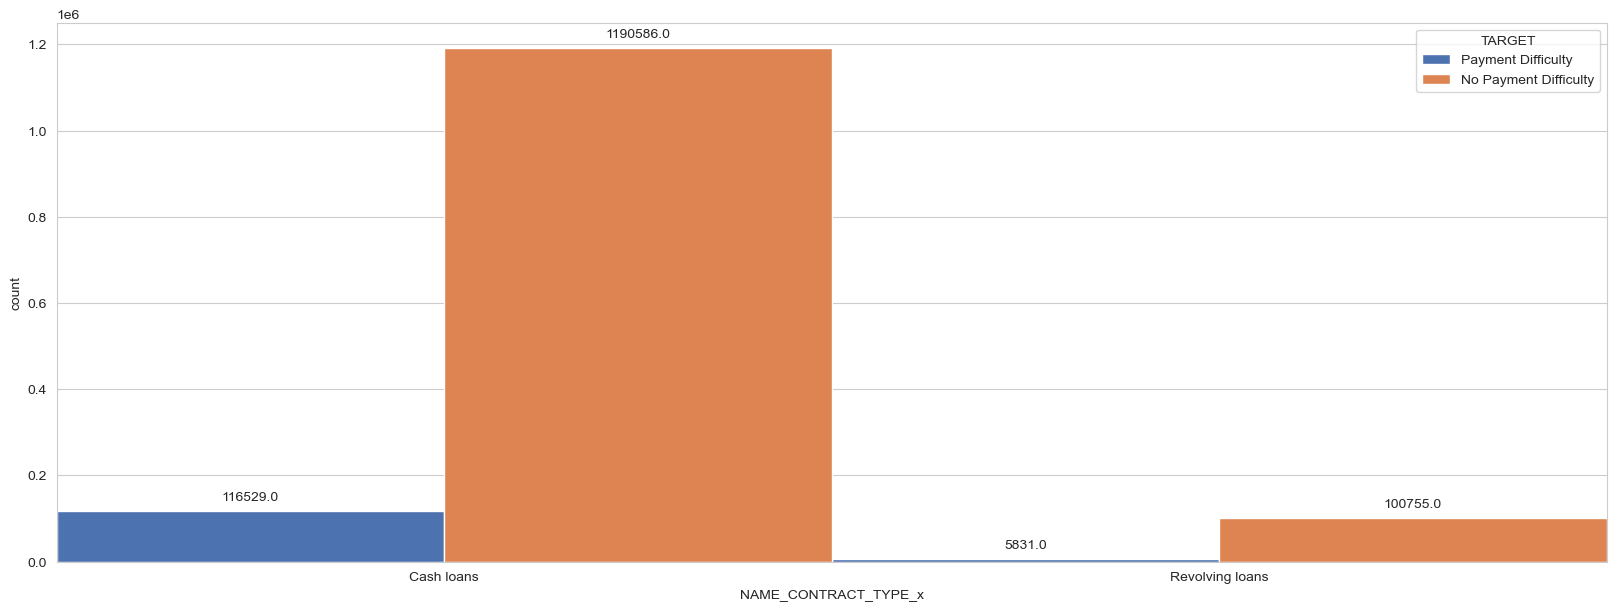

In [200]:
#NAME_CONTRACT_TYPE - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df,x="NAME_CONTRACT_TYPE_x",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_CONTRACT_TYPE_x"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

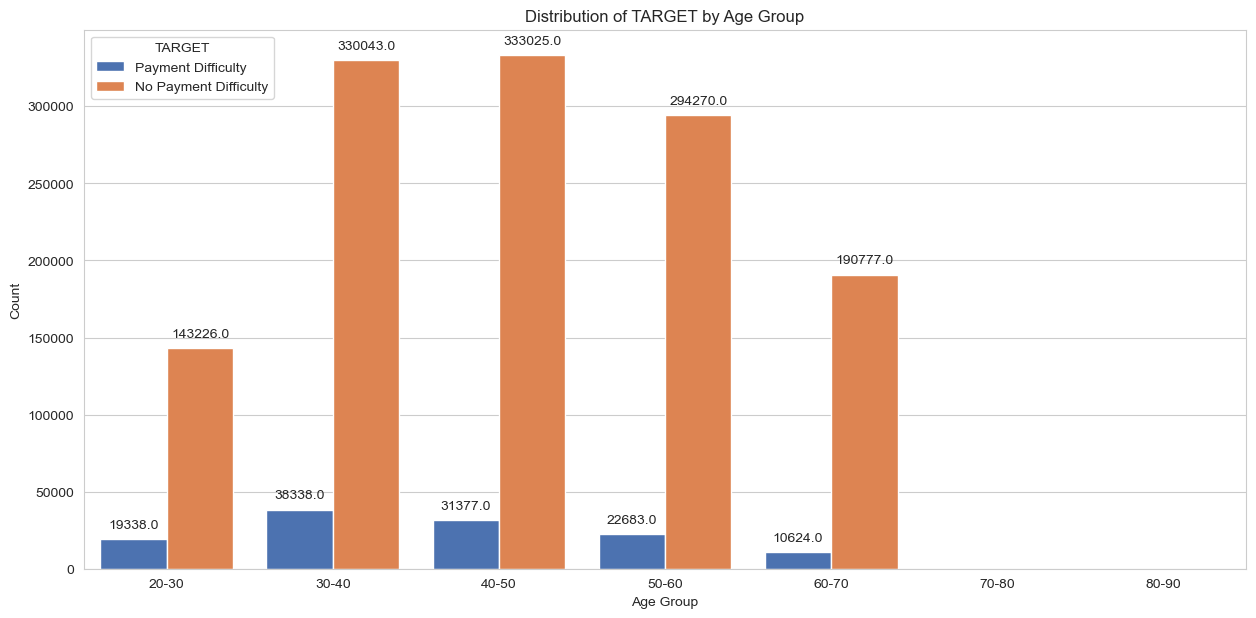

In [201]:
#AGE - TARGET

# Create age bins
bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Define the bin edges
labels = ["20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]  # Define bin labels
merged_df["AGE_BIN"] = pd.cut(merged_df["AGE"], bins=bins, labels=labels, right=False)

# Plot the countplot
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df, x="AGE_BIN", width=0.8, palette="deep", hue="TARGET", saturation=1, order=labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Set figure size
fig.set_size_inches(15, 7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")

# Set plot title and labels
plt.title("Distribution of TARGET by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Show the plot
plt.show()

In [202]:
# Reload dataset again since occupation type can be significant as well.

reload_df = pd.read_csv("application_data.csv")

reload_df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [203]:
# Merge the OCCUPATION_TYPE column from reload_df into merged_df
# Drop the existing OCCUPATION_TYPE column from merged_df if it exists
if 'OCCUPATION_TYPE' in merged_df.columns:
    merged_df = merged_df.drop(columns=['OCCUPATION_TYPE'])

# Merge the new OCCUPATION_TYPE column from reload_df into merged_df
merged_df = pd.merge(merged_df, reload_df[['SK_ID_CURR', 'OCCUPATION_TYPE']], on='SK_ID_CURR', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  object  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   CNT_CHILDREN                 1413701 non-null  int64   
 5   AMT_INCOME_TOTAL             1413701 non-null  float64 
 6   AMT_CREDIT_x                 1413701 non-null  float64 
 7   AMT_ANNUITY_x                1413701 non-null  float64 
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64 
 9   NAME_TYPE_SUITE              1413701 non-null  object  
 10  NAME_INCOME_TYPE             1413701 non-null  object  
 11  NAME_EDUCATION_TYPE          1413701 non-null  object  
 12  NAME_FAMILY_STATUS          

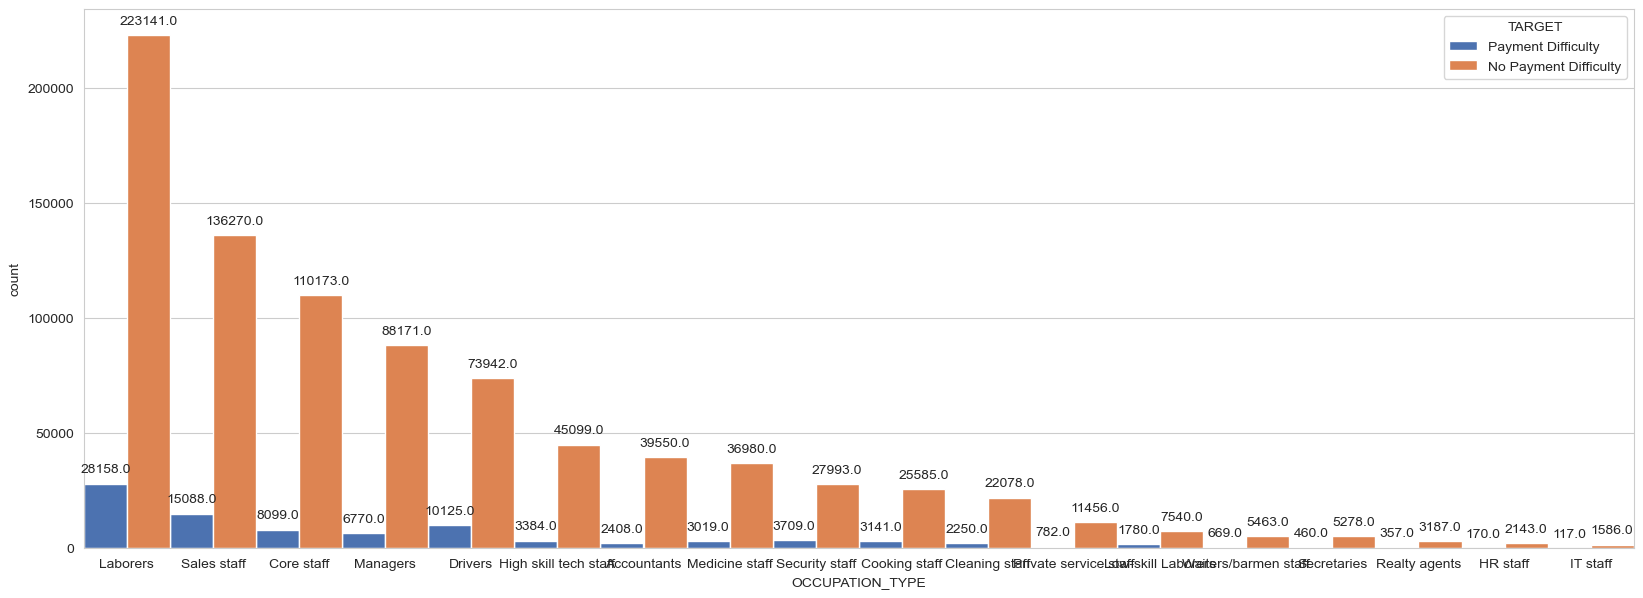

In [204]:
#OCCUPATION_TYPE - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df, x="OCCUPATION_TYPE",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

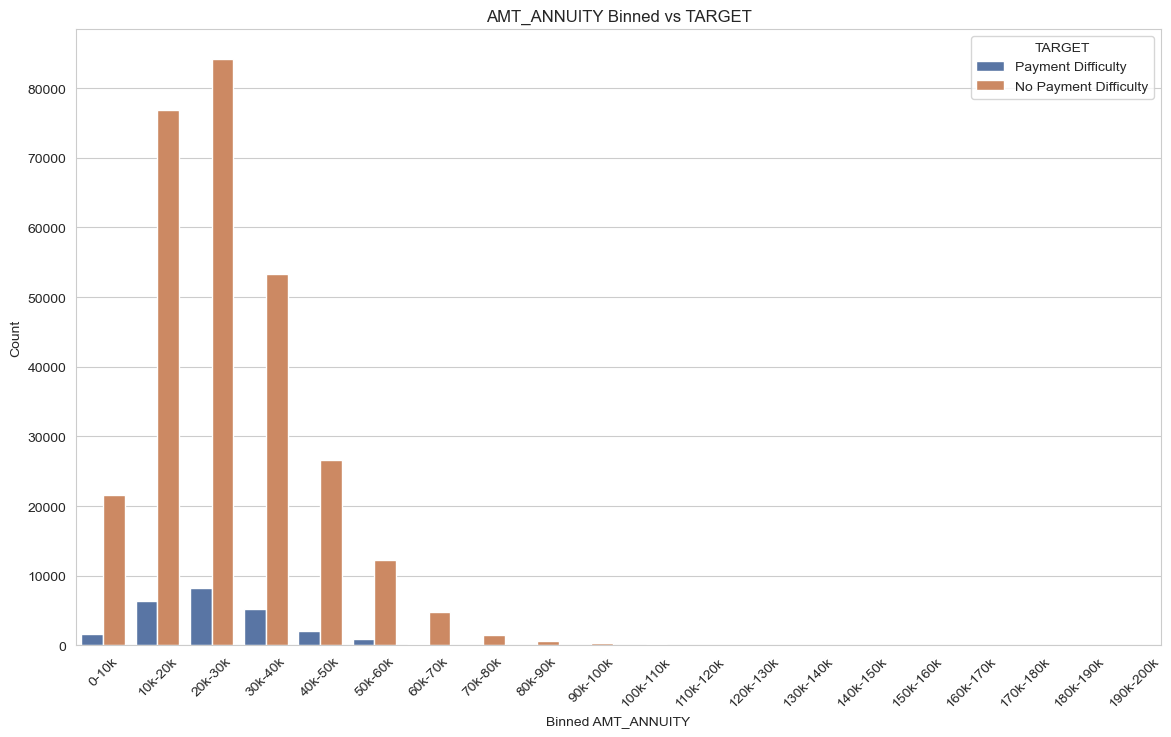

In [205]:
#AMT_ANNUITY - TARGET

df_filtered = pd.read_csv("df_filtered.csv")

df_filtered["TARGET"] = df_filtered["TARGET"].astype(str)

# Define custom bin edges (increments of 10,000)
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]

# Create bin labels corresponding to the bin edges
bin_labels = [
    "0-10k", "10k-20k", "20k-30k", "30k-40k", "40k-50k",
    "50k-60k", "60k-70k", "70k-80k", "80k-90k", "90k-100k",
    "100k-110k", "110k-120k", "120k-130k", "130k-140k", "140k-150k",
    "150k-160k", "160k-170k", "170k-180k", "180k-190k", "190k-200k"
]

# Create the binned AMT_ANNUITY column
df_filtered["AMT_ANNUITY_BINNED"] = pd.cut(df_filtered["AMT_ANNUITY"], bins=bins, labels=bin_labels, include_lowest=True)

# Plotting the binned AMT_ANNUITY against TARGET
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df_filtered, x="AMT_ANNUITY_BINNED", hue="TARGET", palette="deep")
plt.xticks(rotation=45)
plt.title("AMT_ANNUITY Binned vs TARGET")
plt.xlabel("Binned AMT_ANNUITY")
plt.ylabel("Count")

# Adjust legend
plt.legend(title="TARGET", labels=["Payment Difficulty", "No Payment Difficulty"])
plt.show()

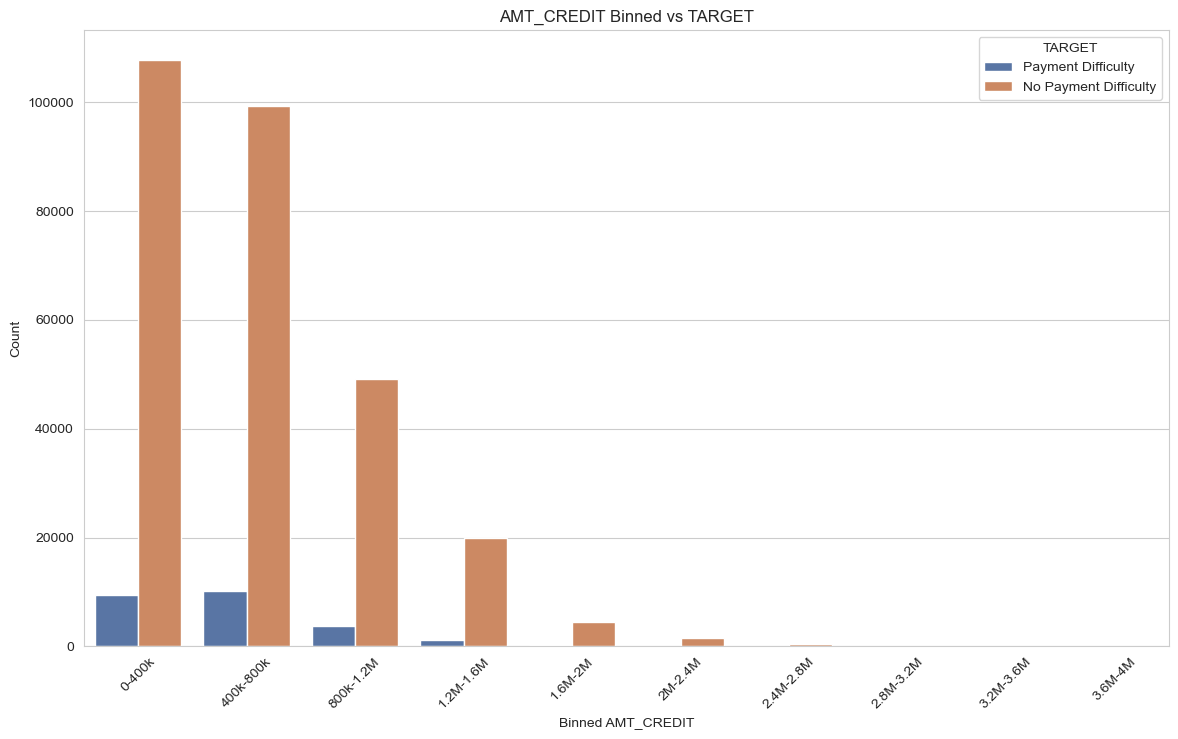

In [206]:
#AMT_CREDIT - TARGET

# Define custom bin edges for AMT_CREDIT (increments of 400,000 up to 4,000,000)
bins = [0, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000, 3600000, 4000000]

# Create bin labels corresponding to the bin edges
bin_labels = [
    "0-400k", "400k-800k", "800k-1.2M", "1.2M-1.6M", "1.6M-2M",
    "2M-2.4M", "2.4M-2.8M", "2.8M-3.2M", "3.2M-3.6M", "3.6M-4M"
]

# Create the binned AMT_CREDIT column
df_filtered["AMT_CREDIT_BINNED"] = pd.cut(df_filtered["AMT_CREDIT"], bins=bins, labels=bin_labels, include_lowest=True)

# Plotting the binned AMT_CREDIT against TARGET
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df_filtered, x="AMT_CREDIT_BINNED", hue="TARGET", palette="deep")
plt.xticks(rotation=45)
plt.title("AMT_CREDIT Binned vs TARGET")
plt.xlabel("Binned AMT_CREDIT")
plt.ylabel("Count")

# Adjust legend
plt.legend(title="TARGET", labels=["Payment Difficulty", "No Payment Difficulty"])

# Show the plot
plt.show()

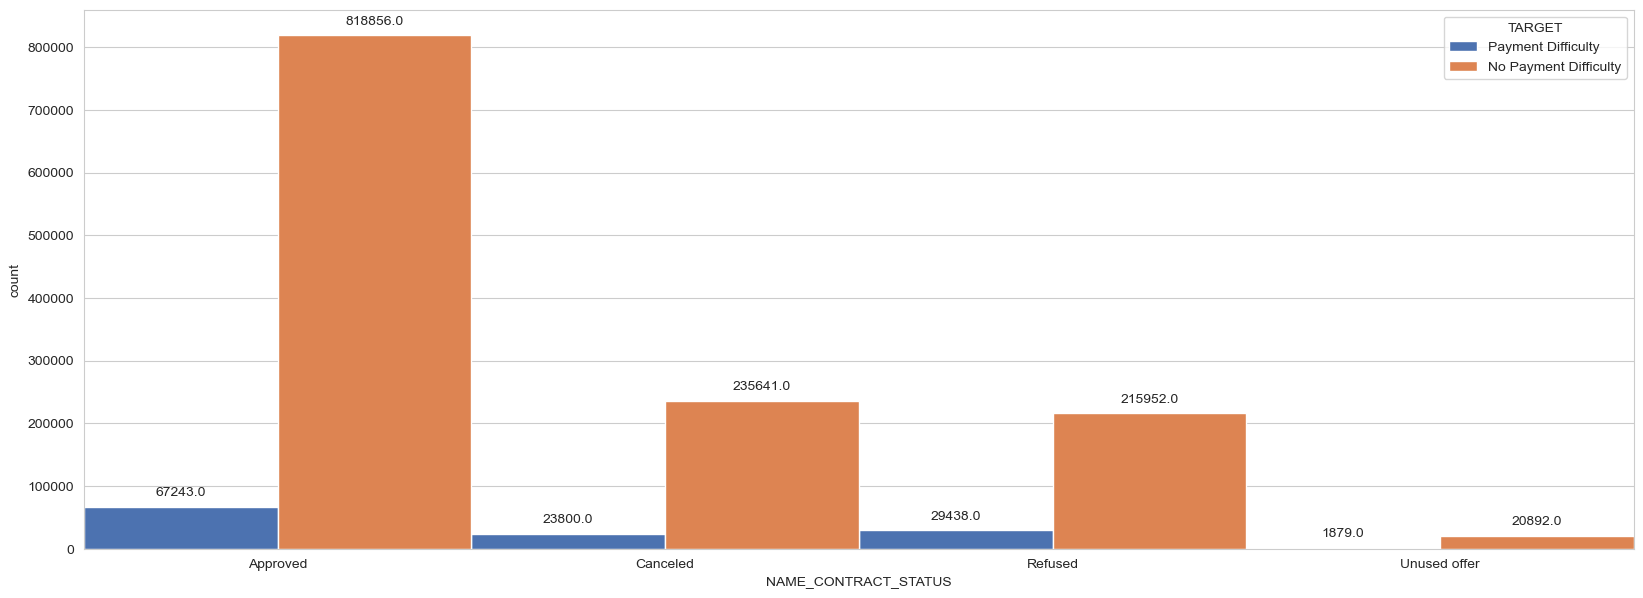

In [207]:
#NAME_CONTRACT_STATUS - TARGET

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.countplot(data=merged_df, x="NAME_CONTRACT_STATUS",width=1,palette="deep",hue="TARGET",saturation=1,order=merged_df["NAME_CONTRACT_STATUS"].value_counts().index)
plt.xticks(rotation=0)
fig.set_size_inches(20 ,7)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha="center", va="center", 
                xytext=(0, 10), textcoords="offset points")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Payment Difficulty", "No Payment Difficulty"], title="TARGET")


plt.show()

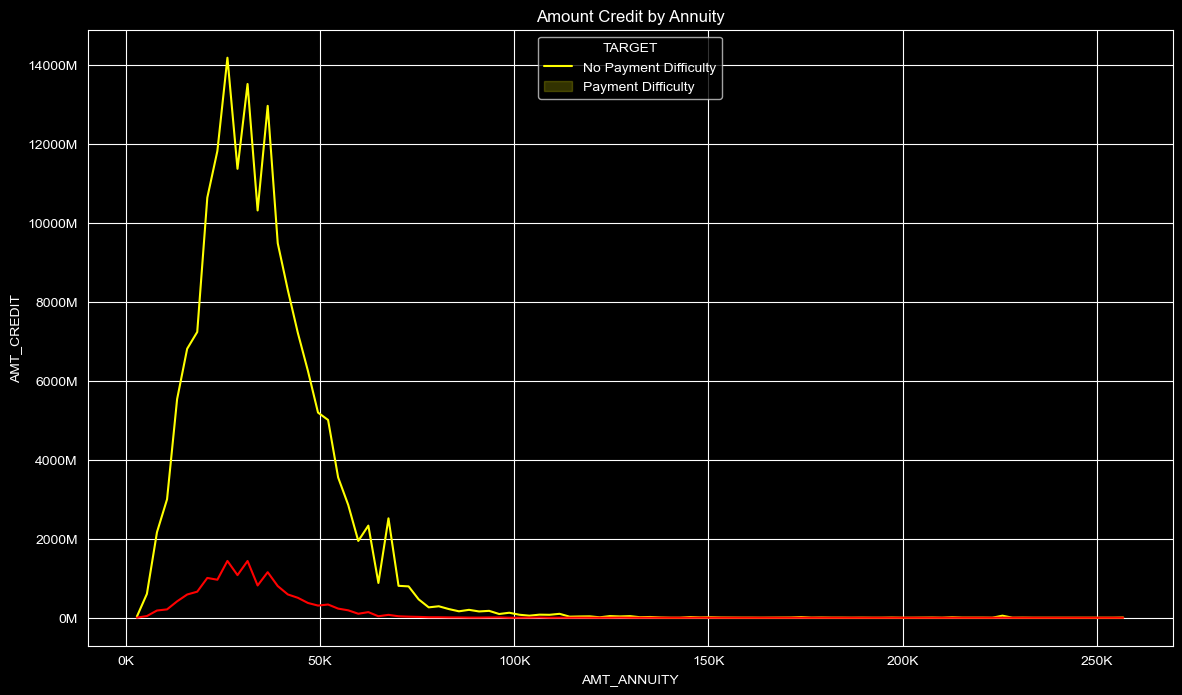

In [208]:
# AMT_ANNUITY, AMT_CREDIT - TARGET

bins = np.linspace(df_filtered['AMT_ANNUITY'].min(), df_filtered['AMT_ANNUITY'].max(), 100)
df_filtered['AMT_ANNUITY_BIN'] = pd.cut(df_filtered['AMT_ANNUITY'], bins=bins)

# Aggregate data: sum of AMT_CREDIT for each bin and TARGET category
aggregated = df_filtered.groupby(['AMT_ANNUITY_BIN', 'TARGET'])['AMT_CREDIT'].sum().reset_index()

# Convert bins to midpoint values for plotting
aggregated['AMT_ANNUITY_BIN_MID'] = aggregated['AMT_ANNUITY_BIN'].apply(lambda x: x.mid)

# Set the dark background style
plt.style.use('dark_background')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated, x="AMT_ANNUITY_BIN_MID", y="AMT_CREDIT", hue="TARGET", palette=["yellow", "red"])

# Customizing the plot
plt.title("Amount Credit by Annuity")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.legend(title="TARGET", labels=["No Payment Difficulty", "Payment Difficulty"], loc='upper center')

# Set custom y-axis labels in millions and x-axis in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Show the plot
plt.show()

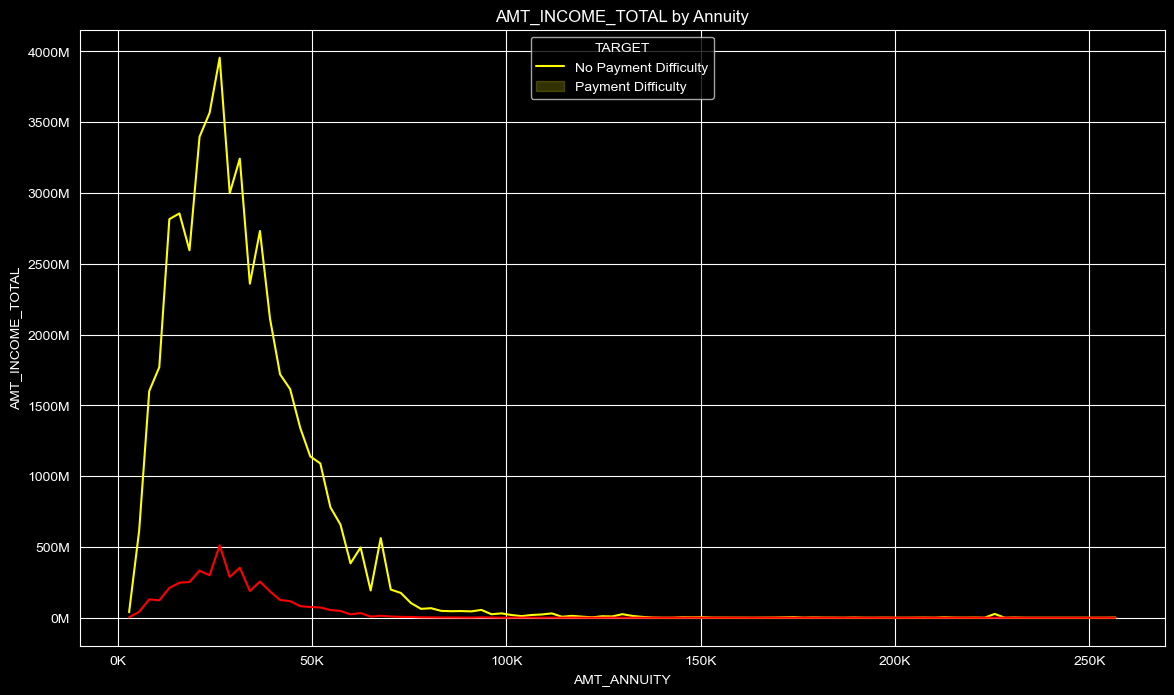

In [209]:
# AMT_INCOME_TOTAL, AMT_CREDIT - TARGET

bins = np.linspace(df_filtered["AMT_ANNUITY"].min(), df_filtered["AMT_ANNUITY"].max(), 100)
df_filtered["AMT_ANNUITY_BIN"] = pd.cut(df_filtered["AMT_ANNUITY"], bins=bins)

# Aggregate data: sum of AMT_CREDIT for each bin and TARGET category
aggregated = df_filtered.groupby(["AMT_ANNUITY_BIN", "TARGET"])["AMT_INCOME_TOTAL"].sum().reset_index()

# Convert bins to midpoint values for plotting
aggregated["AMT_ANNUITY_BIN_MID"] = aggregated["AMT_ANNUITY_BIN"].apply(lambda x: x.mid)

# Set the dark background style
plt.style.use("dark_background")

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated, x="AMT_ANNUITY_BIN_MID", y="AMT_INCOME_TOTAL", hue="TARGET", palette=["yellow", "red"])

# Customizing the plot
plt.title("AMT_INCOME_TOTAL by Annuity")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="TARGET", labels=["No Payment Difficulty", "Payment Difficulty"], loc="upper center")

# Set custom y-axis labels in millions and x-axis in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

# Show the plot
plt.show()

Top 10 correlation pairs and their values for TARGET = 1:
OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE: Correlation = 0.998
OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE: Correlation = 0.998
AMT_CREDIT and AMT_GOODS_PRICE: Correlation = 0.983
AMT_GOODS_PRICE and AMT_CREDIT: Correlation = 0.983
REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT: Correlation = 0.957
REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY: Correlation = 0.957
CNT_CHILDREN and CNT_FAM_MEMBERS: Correlation = 0.885
CNT_FAM_MEMBERS and CNT_CHILDREN: Correlation = 0.885
DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE: Correlation = 0.869
DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE: Correlation = 0.869

Top 10 correlation pairs and their values for TARGET = 0:
OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE: Correlation = 0.999
OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE: Correlation = 0.999
AMT_CREDIT and AMT_GOODS_PRICE: Correlation = 0.987
AMT_GOODS_PRICE and A

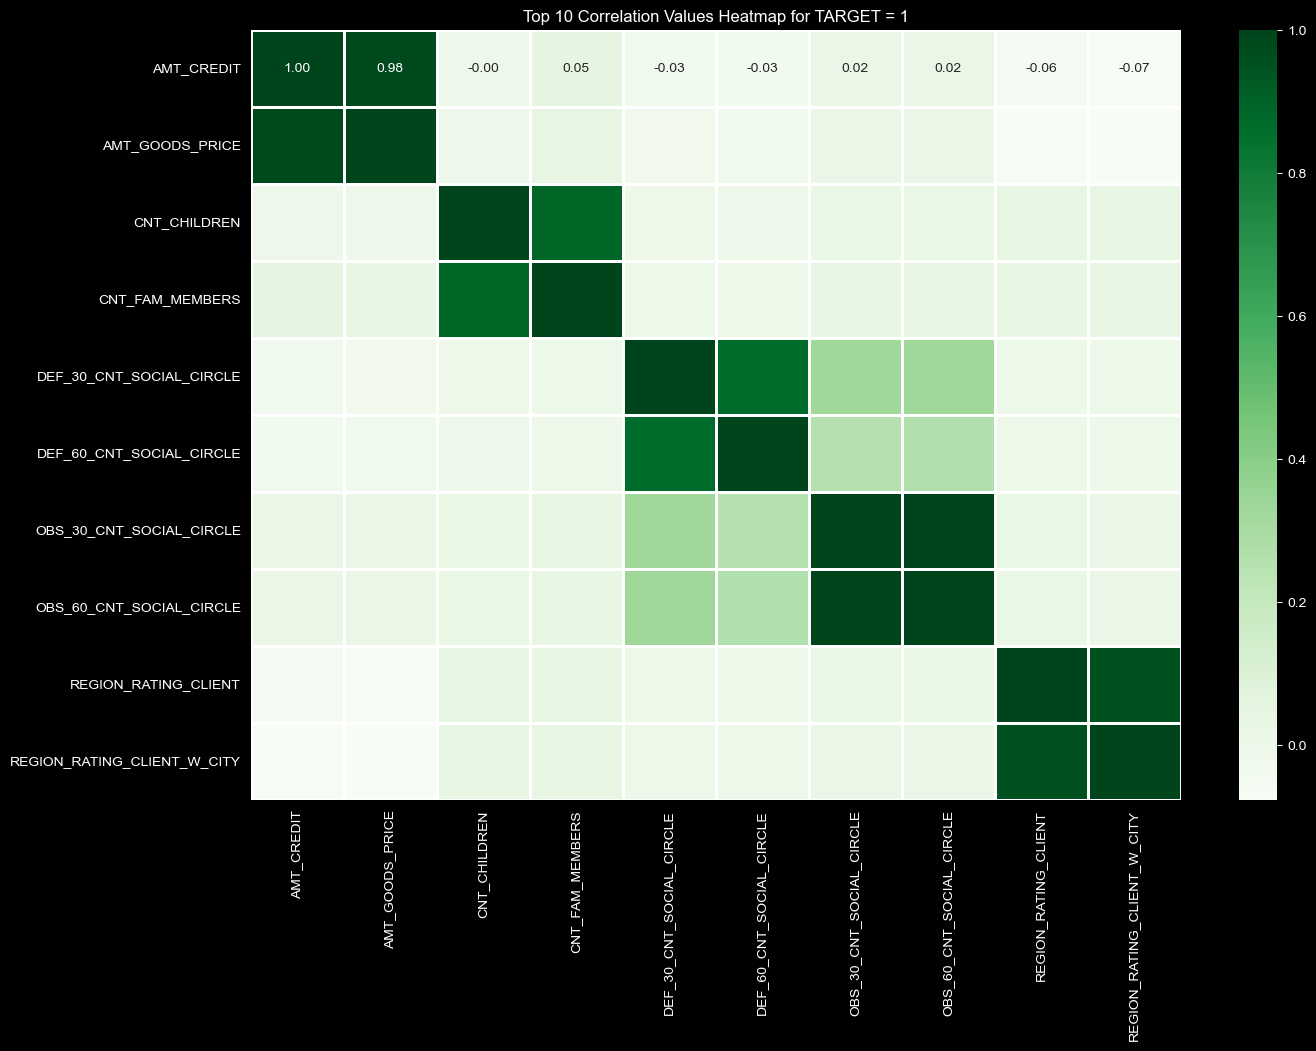

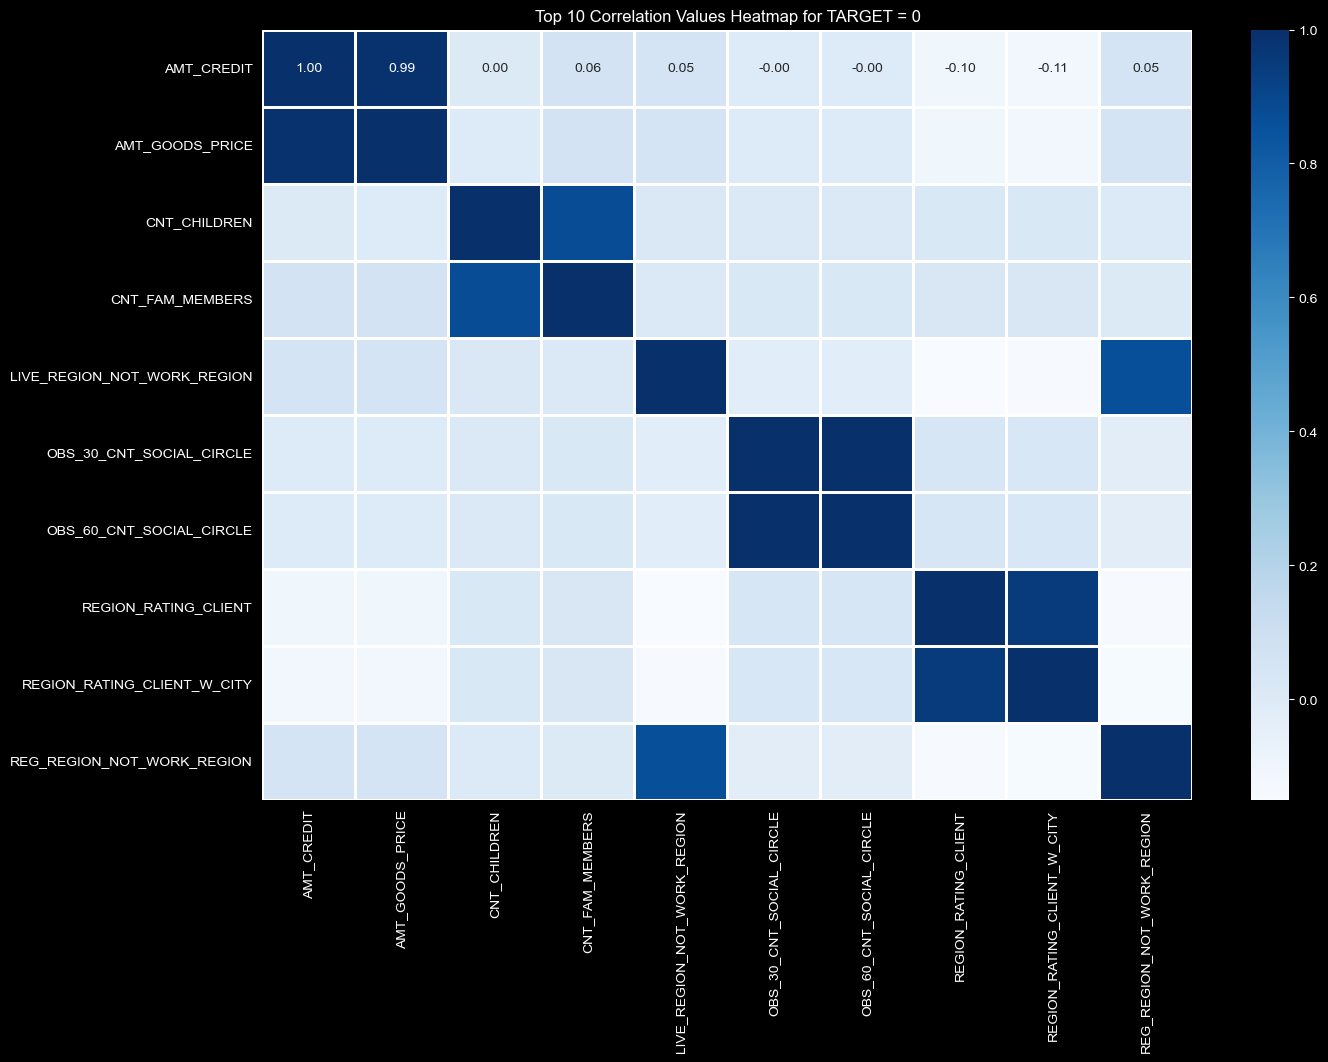

In [210]:
# Found out top 10 correlations value cloumns - TARGET = 1 and TARGET = 0
merged_df1 = pd.read_csv("df_filtered.csv")
def get_top_10_correlations(df, target_value):
    # Filter the dataset for the specified TARGET value
    df_filtered = df.loc[df["TARGET"] == target_value]

    # Drop the columns "SK_ID_CURR" and "TARGET"
    df_filtered = df_filtered.drop(columns=["SK_ID_CURR", "TARGET"])

    # Select only numeric columns
    numeric_df = df_filtered.select_dtypes(include=[float, int])

    # Calculate the correlation matrix for the numeric columns
    correlation_matrix = numeric_df.corr()

    # Unstack the correlation matrix to create a Series with pairs of columns
    corr_pairs = correlation_matrix.abs().unstack()

    # Remove self-correlations (correlation of a variable with itself)
    corr_pairs = corr_pairs[corr_pairs < 1]

    # Sort the correlation pairs in descending order and get the top 10
    top_10_corr_pairs = corr_pairs.sort_values(ascending=False).head(10)

    # Get the unique columns involved in the top 10 pairs
    top_10_columns = top_10_corr_pairs.index.get_level_values(0).union(top_10_corr_pairs.index.get_level_values(1))

    # Create a DataFrame with only these top 10 columns
    top_10_df = numeric_df[top_10_columns]

    return top_10_corr_pairs, top_10_df


# Get the top 10 correlation pairs and data for TARGET = 1
top_10_corr_pairs_1, top_10_df_1 = get_top_10_correlations(merged_df1, 1)
print("Top 10 correlation pairs and their values for TARGET = 1:")
for index, value in top_10_corr_pairs_1.items():
    print(f"{index[0]} and {index[1]}: Correlation = {value:.3f}")

# Get the top 10 correlation pairs and data for TARGET = 0
top_10_corr_pairs_0, top_10_df_0 = get_top_10_correlations(merged_df1, 0)
print("\nTop 10 correlation pairs and their values for TARGET = 0:")
for index, value in top_10_corr_pairs_0.items():
    print(f"{index[0]} and {index[1]}: Correlation = {value:.3f}")

# Create a heatmap for TARGET = 1
fig = plt.figure(figsize=(15, 10))
sns.heatmap(top_10_df_1.corr(), cmap="Greens", linewidths=1, annot=True, fmt=".2f")
plt.title("Top 10 Correlation Values Heatmap for TARGET = 1")
plt.show()

# Create a heatmap for TARGET = 0
fig = plt.figure(figsize=(15, 10))
sns.heatmap(top_10_df_0.corr(), cmap="Blues", linewidths=1, annot=True, fmt=".2f")
plt.title("Top 10 Correlation Values Heatmap for TARGET = 0")
plt.show()